In [1]:
# This program is based on the Udemy course "Python for Finance: Investment Fundamentals & Data Analytics" 
# by Martin and Ned from 365
# Link to the course: https://www.udemy.com/course/python-for-finance-investment-fundamentals-data-analytics/
# This is a jupyter notebook file, better to run in jupyter notebook enviorment.
# Author: Martin and Ned, 365 Team. 
# Updated by: Kuo L. 2022-02-15
# Use this script to compare expected performance with actual performance with 3 year increments.

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# It uses yahoo finance api to get close price for each ticker stock/ETF.
# use any 3 tickers, I just use vanguard ETFs.
# you can put more than 3 tickers, just note that the more tickers in, 
# the more calculation needed to plot efficient frontier. change num_simulation to a higher number as needed.

# num_simulation = 3000
assets = ['APD', 'BTI', 'COST','CWEN-A','DVN', 'MFA', 'MPW','NLY','NYMT','PAA','PFFV','VGT','VOO','VUG','GOOGL','VZ','PYPL','VIG','HDV','VHT']
money_invested = [3852,884,1421,8569,6005,3507,3411,5958,3120,3547,5809,7945,15912,14171,7627,5362,2492,1638,1066,255]
if len(assets) == len(money_invested):
    pf_data = pd.DataFrame()
    weights = money_invested
    weights /= np.sum(weights)

    for a in assets:
        #you can chagne the start date to any date in 'yyyy-mm-dd' format and end = 'yyyy-mm-dd'.
        pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2019-1-1')['Adj Close'] 
else:
    raise Exception

In [3]:
# pf_data.head() #makre sure companies were public at starting date

In [4]:
# pf_data.tail() #check companies still open and public at ending date

<AxesSubplot:xlabel='Date'>

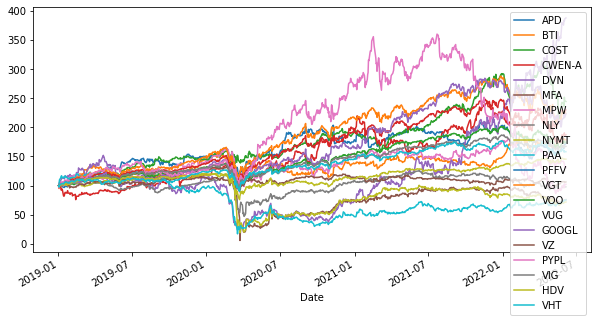

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5)) #Plot of company performance without considering dividends

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1)) #get average daily log returns

In [7]:
indi_return = log_returns.mean() * 250 #get yearly returns(daily return x # of days a year). Market open roughly 250 days a year, so I do not use 365. 

In [8]:
log_returns.cov() * 250 #get coveriance between each pair.

,APD,BTI,COST,CWEN-A,DVN,MFA,MPW,NLY,NYMT,PAA,PFFV,VGT,VOO,VUG,GOOGL,VZ,PYPL,VIG,HDV,VHT
APD,0.089466,0.035009,0.035150,0.049188,0.070824,-0.008279,0.058391,0.047119,0.036307,0.060285,0.005460,0.055221,0.049567,0.049880,0.047729,0.026856,0.059897,0.047190,0.044943,0.041648
BTI,0.035009,0.076131,0.019577,0.033917,0.063547,0.010318,0.046854,0.033210,0.036610,0.056529,0.002961,0.033709,0.033637,0.031139,0.029796,0.020746,0.031671,0.031909,0.035202,0.029813
COST,0.035150,0.019577,0.058478,0.031111,0.025514,0.014768,0.032761,0.019392,0.018850,0.018151,0.004349,0.044146,0.035041,0.040757,0.038605,0.019016,0.044965,0.033072,0.026110,0.029888
CWEN-A,0.049188,0.033917,0.031111,0.131222,0.066551,0.045419,0.062732,0.048973,0.075193,0.081678,0.006012,0.049888,0.045395,0.046387,0.040353,0.025193,0.055736,0.041993,0.039512,0.040035
DVN,0.070824,0.063547,0.025514,0.066551,0.450529,0.018668,0.085136,0.094490,0.145436,0.275426,0.011753,0.080856,0.081060,0.073153,0.078313,0.028631,0.078503,0.066796,0.086605,0.055879
MFA,-0.008279,0.010318,0.014768,0.045419,0.018668,1.888680,0.087793,0.152247,0.728000,0.108907,0.007488,-0.005582,0.007674,0.002879,-0.003283,0.030281,-0.034725,0.005630,0.013617,0.001834
MPW,0.058391,0.046854,0.032761,0.062732,0.085136,0.087793,0.132225,0.072108,0.112532,0.097498,0.006762,0.058854,0.056536,0.056265,0.052921,0.032601,0.063367,0.052543,0.051903,0.048418
NLY,0.047119,0.033210,0.019392,0.048973,0.094490,0.152247,0.072108,0.129497,0.149192,0.113894,0.005825,0.042888,0.045619,0.041520,0.034936,0.021250,0.044197,0.040909,0.045352,0.033842
NYMT,0.036307,0.036610,0.018850,0.075193,0.145436,0.728000,0.112532,0.149192,0.522336,0.202493,0.008541,0.044750,0.049279,0.045668,0.040887,0.027933,0.038690,0.041199,0.045927,0.034343
PAA,0.060285,0.056529,0.018151,0.081678,0.275426,0.108907,0.097498,0.113894,0.202493,0.375710,0.007744,0.065597,0.068812,0.062647,0.061156,0.024176,0.066613,0.056940,0.069201,0.050120


In [9]:
log_returns.corr() #get correlation between each pair.

,APD,BTI,COST,CWEN-A,DVN,MFA,MPW,NLY,NYMT,PAA,PFFV,VGT,VOO,VUG,GOOGL,VZ,PYPL,VIG,HDV,VHT
APD,1.000000,0.424193,0.485957,0.453964,0.352768,-0.020141,0.536860,0.437756,0.167954,0.328817,0.269506,0.644763,0.730786,0.649778,0.520529,0.473396,0.447532,0.763157,0.712362,0.667839
BTI,0.424193,1.000000,0.293406,0.339340,0.343126,0.027210,0.466995,0.334470,0.183590,0.334244,0.167206,0.426675,0.537608,0.439739,0.352263,0.396439,0.256527,0.559404,0.604866,0.518245
COST,0.485957,0.293406,1.000000,0.355147,0.157187,0.044436,0.372568,0.222843,0.107857,0.122457,0.225977,0.637568,0.639001,0.656709,0.520768,0.414601,0.415553,0.661543,0.511894,0.592810
CWEN-A,0.453964,0.339340,0.355147,1.000000,0.273708,0.091234,0.476243,0.375685,0.287209,0.367854,0.252857,0.480978,0.552625,0.498955,0.363383,0.366689,0.343859,0.560749,0.517124,0.530084
DVN,0.352768,0.343126,0.157187,0.273708,1.000000,0.020237,0.348814,0.391198,0.299803,0.669449,0.261218,0.420710,0.532566,0.424662,0.380598,0.224903,0.261383,0.481373,0.611721,0.399301
MFA,-0.020141,0.027210,0.044436,0.091234,0.020237,1.000000,0.175680,0.307850,0.732955,0.129285,0.278624,-0.014185,0.024624,0.008164,-0.007793,0.116173,-0.056470,0.019817,0.046976,0.006399
MPW,0.536860,0.466995,0.372568,0.476243,0.348814,0.175680,1.000000,0.551059,0.428196,0.437434,0.328445,0.565264,0.685635,0.602907,0.474748,0.472699,0.389456,0.698962,0.676714,0.638643
NLY,0.437756,0.334470,0.222843,0.375685,0.391198,0.307850,0.551059,1.000000,0.573640,0.516350,0.345431,0.416232,0.559043,0.449570,0.316692,0.311343,0.274483,0.549902,0.597501,0.451059
NYMT,0.167954,0.183590,0.107857,0.287209,0.299803,0.732955,0.428196,0.573640,1.000000,0.457098,0.341522,0.216246,0.300684,0.246209,0.184547,0.203780,0.119638,0.275742,0.301274,0.227916
PAA,0.328817,0.334244,0.122457,0.367854,0.669449,0.129285,0.437434,0.516350,0.457098,1.000000,0.224876,0.373755,0.495069,0.398237,0.325469,0.207957,0.242876,0.449351,0.535249,0.392190


***

In [10]:

pfolio_returns = np.sum(weights * log_returns.mean()) * 250
pfolio_volatilities = np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))
  
# portfolio.append({'portfolio_return':pfolio_returns}, ignore_index=True)

portfolio = pd.DataFrame({'assets':assets,
                          'money invested':money_invested,
                          'weights':weights,
                          'return':indi_return,
                          'pf_return':pfolio_returns,
                          'Pf_volatilities': pfolio_volatilities 
                          })
print(portfolio)

        assets  money invested   weights    return  pf_return  Pf_volatilities
APD        APD            3852  0.037562  0.159662   0.141219         0.235508
BTI        BTI             884  0.008620  0.168293   0.141219         0.235508
COST      COST            1421  0.013857  0.258707   0.141219         0.235508
CWEN-A  CWEN-A            8569  0.083558  0.241690   0.141219         0.235508
DVN        DVN            6005  0.058556  0.392448   0.141219         0.235508
MFA        MFA            3507  0.034198 -0.079210   0.141219         0.235508
MPW        MPW            3411  0.033261  0.077455   0.141219         0.235508
NLY        NLY            5958  0.058098 -0.005957   0.141219         0.235508
NYMT      NYMT            3120  0.030424 -0.095285   0.141219         0.235508
PAA        PAA            3547  0.034588 -0.082654   0.141219         0.235508
PFFV      PFFV            5809  0.056645  0.048910   0.141219         0.235508
VGT        VGT            7945  0.077474  0.233520  

In [12]:
#generate path and name then export
path = 'csv_results/'
name ='portfolio_of_' + '_'.join(assets) + '.csv'
path_name = path + name 
portfolio.to_csv(path_name)

In [13]:
#get actual portfolio return
print("Actual annual portfolio return is {:.1f}".format(pfolio_returns*100) + "%")
#get actual portfolio volatility
print("Actual annual portfolio volatility is {:.1f}".format(pfolio_volatilities*100) +"%")


Actual annual portfolio return is 14.1%
Actual annual portfolio volatility is 23.6%
